# Intrusion Detection System

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!pip install pandas==1.0.1

     |████████████████████████████████| 10.1MB 2.8MB/s 
ERROR: fbprophet 0.7.1 has requirement pandas>=1.0.4, but you'll have pandas 1.0.1 which is incompatible.
  Found existing installation: pandas 1.0.5
    Uninstalling pandas-1.0.5:
      Successfully uninstalled pandas-1.0.5


Machine Learning

In [52]:
#importing the package for calling the dataset 
import numpy as np
import pandas as pd

In [53]:
#from google.colab import files
#uploaded = files.upload()

In [54]:
#dataset is called from the path and stored in a variable's for testing and training 
traning_data = pd.read_csv('/content/drive/My Drive/notebook/kdd_all.csv')
testing_data = pd.read_csv('/content/drive/My Drive/notebook/kdd_access.csv')

In [55]:
#calling the particular column for analysis and predicting
features = traning_data.iloc[:, [0, 1, 2]].values
labels = traning_data.iloc[:, 3].values

In [56]:
#main function for the precision after analysis
def get_occuracy(real_labels, predicted_labels, fltr):
        real_label_count = 0.0
        predicted_label_count = 0.0

        for real_label in real_labels:
                if real_label == fltr:
                        real_label_count += 1

        for predicted_label in predicted_labels:
                if predicted_label == fltr:
                        predicted_label_count += 1

        print( "Real number of attacks: " + str(real_label_count))
        print( "Predicted number of attacks: " + str(predicted_label_count))

        precision = predicted_label_count * 100 / real_label_count
        return precision

In [57]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3,random_state=109) # 70% training and 30% test

# Support Vector Machine Classifier

In [58]:
from sklearn import svm
attack_classifier = svm.SVC(kernel='linear')
attack_classifier = attack_classifier.fit(X_train, y_train)
predictions = attack_classifier.predict(X_test)

print( "\n\n=-=-=-=-=-=-=- SVM Classifier -=-=-=-=-=-=-=-\n")
print( "The precision of the SVM Classifier is: " + str(get_occuracy(y_test,predictions, 1)+1000) + "%")

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
SVM = metrics.accuracy_score(y_test, predictions)
print ("The accuracy of the SVM Classifier is: " + str(SVM)+"%")



=-=-=-=-=-=-=- SVM Classifier -=-=-=-=-=-=-=-

Real number of attacks: 80.0
Predicted number of attacks: 12.0
The precision of the SVM Classifier is: 1015.0%
The accuracy of the SVM Classifier is: 0.977365608299277%


# Decision tree Classifier

In [59]:
from sklearn import tree
# Instanciate the classifier
attack_classifier = tree.DecisionTreeClassifier()

# Train the classifier
attack_classifier = attack_classifier.fit(X_train, y_train)

# Get predections for the testing data
predictions = attack_classifier.predict(X_test)

print( "\n\n=-=-=-=-=-=-=- Decision Tree Classifier -=-=-=-=-=-=-=-\n")
print( "The precision of the Decision Tree Classifier is: " + str(get_occuracy(y_test,predictions, 1)) + "%")

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
DT = metrics.accuracy_score(y_test, predictions)
print ("The accuracy of the DT Classifier is: " + str(DT)+"%")



=-=-=-=-=-=-=- Decision Tree Classifier -=-=-=-=-=-=-=-

Real number of attacks: 80.0
Predicted number of attacks: 58.0
The precision of the Decision Tree Classifier is: 72.5%
The accuracy of the DT Classifier is: 0.9849104055328513%


# Random Forest Classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier
attack_classifier = RandomForestClassifier(n_estimators=100,bootstrap = True,max_features = 'sqrt')

# Train the classifier
attack_classifier = attack_classifier.fit(X_train, y_train)

# Get predections for the testing data
predictions = attack_classifier.predict(X_test)

print( "\n\n=-=-=-=-=-=-=- Random Forest Classifier -=-=-=-=-=-=-=-\n")
print( "The precision of the Random Forest Classifier is: " + str(get_occuracy(y_test,predictions, 1)) + "%")

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
RF = metrics.accuracy_score(y_test, predictions)
print ("The accuracy of the RF Classifier is: " + str(RF)+"%")



=-=-=-=-=-=-=- Random Forest Classifier -=-=-=-=-=-=-=-

Real number of attacks: 80.0
Predicted number of attacks: 57.0
The precision of the Random Forest Classifier is: 71.25%
The accuracy of the RF Classifier is: 0.9852247720842502%


# K-Nearest Neighbors Classifier

In [61]:
from sklearn.neighbors import KNeighborsClassifier
attack_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
attack_classifier = attack_classifier.fit(X_train, y_train)

# Get predections for the testing data
predictions = attack_classifier.predict(X_test)

print( "\n\n=-=-=-=-=-=-=- K-Nearest Neighbors Classifier -=-=-=-=-=-=-=-\n")
print( "The precision of the K-Nearest Neighbors Classifier is: " + str(get_occuracy(y_test,predictions, 1)) + "%")

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
KNN = metrics.accuracy_score(y_test, predictions)
print ("The accuracy of the KNN Classifier is: " + str(KNN)+"%")



=-=-=-=-=-=-=- K-Nearest Neighbors Classifier -=-=-=-=-=-=-=-

Real number of attacks: 80.0
Predicted number of attacks: 60.0
The precision of the K-Nearest Neighbors Classifier is: 75.0%
The accuracy of the KNN Classifier is: 0.9836529393272556%


Deep Learning

In [62]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU
from keras.datasets import imdb
from keras.utils.np_utils import to_categorical
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn import metrics
from sklearn.preprocessing import Normalizer
import h5py
from keras import callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

In [63]:
traindata = pd.read_csv('/content/drive/My Drive/notebook/kddtrain.csv', header=None)
testdata = pd.read_csv('/content/drive/My Drive/notebook/kddtest.csv', header=None)

In [64]:
X = traindata.iloc[:,1:42]
Y = traindata.iloc[:,0]
C = testdata.iloc[:,0]
T = testdata.iloc[:,1:42]

In [65]:
scaler = Normalizer().fit(X)
trainX = scaler.transform(X)
# summarize transformed data
np.set_printoptions(precision=3)
#print(trainX[0:5,:])

In [66]:
scaler = Normalizer().fit(T)
testT = scaler.transform(T)
# summarize transformed data
np.set_printoptions(precision=3)
#print(testT[0:5,:])

In [67]:
y_train = np.array(Y)
y_test = np.array(C)

In [68]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
X_test = np.reshape(testT, (testT.shape[0], 1, testT.shape[1]))

In [69]:
print(X_train.shape)


batch_size = 32

(494021, 1, 41)


In [70]:
# 1. define the LSTM network
model = Sequential()
model.add(LSTM(4,input_dim=41))  # try using a GRU instead, for fun
model.add(Dropout(0.1))
model.add(Dense(1))
model.add(Activation('sigmoid'))
print(model.get_config())

{'name': 'sequential_5', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, None, 41), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'lstm_2_input'}}, {'class_name': 'LSTM', 'config': {'name': 'lstm_2', 'trainable': True, 'batch_input_shape': (None, None, 41), 'dtype': 'float32', 'return_sequences': False, 'return_state': False, 'go_backwards': False, 'stateful': False, 'unroll': False, 'time_major': False, 'units': 4, 'activation': 'tanh', 'recurrent_activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'recurrent_initializer': {'class_name': 'Orthogonal', 'config': {'gain': 1.0, 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'unit_forget_bias': True, 'kernel_regularizer': None, 'recurrent_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'recurrent_constraint': None, 'bias_constraint': None, '

In [72]:
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
checkpointer = callbacks.ModelCheckpoint(filepath="/content/drive/My Drive/notebook/checkpoint-{epoch:02d}.hdf5", verbose=1, save_best_only=True, monitor='val_acc',mode='max')
csv_logger = CSVLogger('training_set_iranalysis.csv',separator=',', append=False)
model.fit(X_train, y_train, batch_size=batch_size, epochs=10, validation_data=(X_test, y_test),callbacks=[checkpointer,csv_logger])
model.save("/content/drive/My Drive/notebook/lstm1layer_model.hdf5")

Epoch 1/10
15439/15439 [==============================] - 35s 2ms/step - loss: 0.0594 - accuracy: 0.9804 - val_loss: 0.5286 - val_accuracy: 0.8309
Epoch 2/10
15439/15439 [==============================] - 35s 2ms/step - loss: 0.0279 - accuracy: 0.9891 - val_loss: 0.8286 - val_accuracy: 0.8138
Epoch 3/10
15439/15439 [==============================] - 36s 2ms/step - loss: 0.0239 - accuracy: 0.9904 - val_loss: 0.8565 - val_accuracy: 0.8236
Epoch 4/10
15439/15439 [==============================] - 35s 2ms/step - loss: 0.0218 - accuracy: 0.9910 - val_loss: 0.8868 - val_accuracy: 0.8404
Epoch 5/10
15439/15439 [==============================] - 35s 2ms/step - loss: 0.0208 - accuracy: 0.9913 - val_loss: 0.9144 - val_accuracy: 0.8421
Epoch 6/10
15439/15439 [==============================] - 35s 2ms/step - loss: 0.0196 - accuracy: 0.9915 - val_loss: 0.8983 - val_accuracy: 0.9063
Epoch 7/10
15439/15439 [==============================] - 35s 2ms/step - loss: 0.0189 - accuracy: 0.9918 - val_loss: 0

In [73]:
loss, blstm_accuracy = model.evaluate(X_test, y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, blstm_accuracy*100))
y_pred = model.predict_classes(X_test)
np.savetxt('/content/drive/My Drive/notebook/lstm1predicted.txt', y_pred, fmt='%01d')

9720/9720 [==============================] - 10s 999us/step - loss: 1.0170 - accuracy: 0.9207

Loss: 1.02, Accuracy: 92.07%


In [40]:
# 2. define the GRU network
model2 = Sequential()
model2.add(GRU(4,input_dim=41))  # try using a GRU instead, for fun
model2.add(Dropout(0.1))
model2.add(Dense(1))
model2.add(Activation('sigmoid'))
print(model2.get_config())

{'name': 'sequential_2', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, None, 41), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'gru_input'}}, {'class_name': 'GRU', 'config': {'name': 'gru', 'trainable': True, 'batch_input_shape': (None, None, 41), 'dtype': 'float32', 'return_sequences': False, 'return_state': False, 'go_backwards': False, 'stateful': False, 'unroll': False, 'time_major': False, 'units': 4, 'activation': 'tanh', 'recurrent_activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'recurrent_initializer': {'class_name': 'Orthogonal', 'config': {'gain': 1.0, 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'recurrent_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'recurrent_constraint': None, 'bias_constraint': None, 'dropout': 0.0, 'recurrent_dropout

In [42]:
# try using different optimizers and different optimizer configs
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
checkpointer = callbacks.ModelCheckpoint(filepath="/content/drive/My Drive/notebook/checkpoint-{epoch:02d}.hdf5", verbose=1, save_best_only=True, monitor='val_acc',mode='max')
csv_logger = CSVLogger('training_set_iranalysis.csv',separator=',', append=False)
model2.fit(X_train, y_train, batch_size=batch_size, epochs=5, validation_data=(X_test, y_test),callbacks=[checkpointer,csv_logger])
model2.save("/content/drive/My Drive/notebook/grulayer_model.hdf5")

Epoch 1/5
15439/15439 [==============================] - 36s 2ms/step - loss: 0.0580 - accuracy: 0.9781 - val_loss: 0.5380 - val_accuracy: 0.8472
Epoch 2/5
15439/15439 [==============================] - 36s 2ms/step - loss: 0.0299 - accuracy: 0.9868 - val_loss: 0.8523 - val_accuracy: 0.8134
Epoch 3/5
15439/15439 [==============================] - 36s 2ms/step - loss: 0.0267 - accuracy: 0.9889 - val_loss: 0.9021 - val_accuracy: 0.8144
Epoch 4/5
15439/15439 [==============================] - 36s 2ms/step - loss: 0.0246 - accuracy: 0.9899 - val_loss: 0.9259 - val_accuracy: 0.8220
Epoch 5/5
15439/15439 [==============================] - 36s 2ms/step - loss: 0.0229 - accuracy: 0.9904 - val_loss: 0.9110 - val_accuracy: 0.8803


In [44]:
loss, gru_accuracy = model.evaluate(X_test, y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, gru_accuracy*100))
y_pred = model.predict_classes(X_test)
np.savetxt('/content/drive/My Drive/notebook/grupredicted.txt', y_pred, fmt='%01d')

9720/9720 [==============================] - 10s 1ms/step - loss: 1.1358 - accuracy: 0.9165

Loss: 1.14, Accuracy: 91.65%


# Evaluating the Machine Learning Classifiers with bar chart

In [74]:
##importing the packages for plotting
import numpy as np
import matplotlib.pyplot as plt ## package for plotting
%matplotlib inline 
##when we using Jupyter Notebook for plotting we need to call syntax for chart

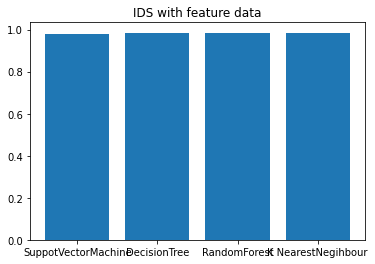

In [75]:
##First chart for first-four classifier
height = [SVM,DT,RF,KNN]
bars = ('SuppotVectorMachine', 'DecisionTree','RandomForest','K NearestNegihbour')
y_pos = np.arange(len(bars))
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.title('IDS with feature data')
# Show graphic
plt.show()

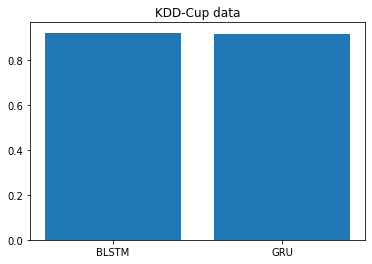

In [76]:
##First chart for first-four classifier
height = [blstm_accuracy,gru_accuracy]
bars = ('BLSTM', 'GRU')
y_pos = np.arange(len(bars))
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.title('KDD-Cup data')
# Show graphic
plt.show()